# week 1:
# a, Air Quality Index Analysis

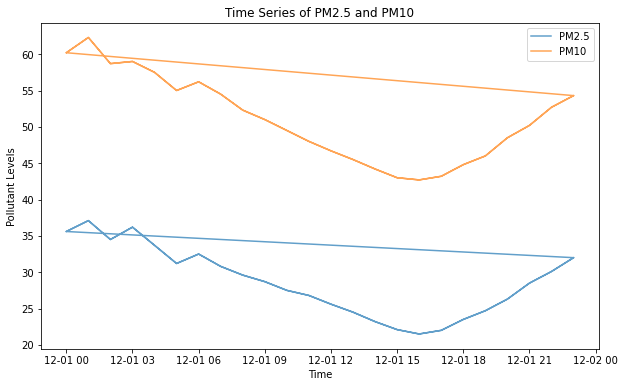

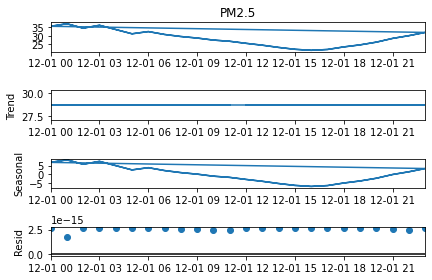

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Load the dataset into a DataFrame
data = {
    "datetime": pd.date_range("2024-12-01", periods=24, freq="H"),
    "PM2.5": [35.6, 37.1, 34.5, 36.2, 33.7, 31.2, 32.5, 30.8, 29.6, 28.7, 27.5, 26.8, 25.6, 24.5, 23.2, 22.1, 21.5, 22.0, 23.5, 24.7, 26.3, 28.5, 30.1, 32.0],
    "PM10": [60.2, 62.3, 58.7, 59.0, 57.5, 55.0, 56.2, 54.5, 52.3, 51.0, 49.5, 48.0, 46.7, 45.5, 44.2, 43.0, 42.7, 43.2, 44.8, 46.0, 48.5, 50.2, 52.7, 54.3],
    "temperature": [22.5, 22.1, 21.9, 21.5, 21.2, 21.0, 21.1, 21.0, 22.0, 23.0, 24.2, 25.1, 26.0, 27.0, 28.0, 28.5, 27.5, 26.5, 25.2, 24.0, 23.0, 22.5, 22.1, 22.0],
    "wind_speed": [3.2, 3.0, 3.1, 3.3, 3.4, 3.5, 3.2, 3.1, 3.0, 2.9, 3.1, 3.2, 3.4, 3.5, 3.6, 3.8, 3.7, 3.5, 3.3, 3.2, 3.0, 2.8, 2.7, 2.5],
}

# Create a DataFrame and set datetime index
df = pd.DataFrame(data)
df.set_index('datetime', inplace=True)

# Simulate two full cycles by repeating the DataFrame
df_extended = pd.concat([df, df.copy()])

# Plot time-series data
plt.figure(figsize=(10, 6))
plt.plot(df_extended.index, df_extended['PM2.5'], label='PM2.5', alpha=0.7)
plt.plot(df_extended.index, df_extended['PM10'], label='PM10', alpha=0.7)
plt.title('Time Series of PM2.5 and PM10')
plt.xlabel('Time')
plt.ylabel('Pollutant Levels')
plt.legend()
plt.show()

# Decompose time series for seasonality analysis
result = seasonal_decompose(df_extended['PM2.5'], model='additive', period=24)
result.plot()
plt.show()

# b, E-Commerce Sales Trends

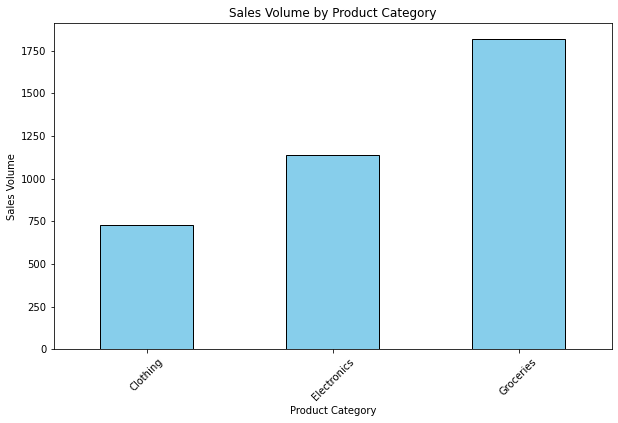

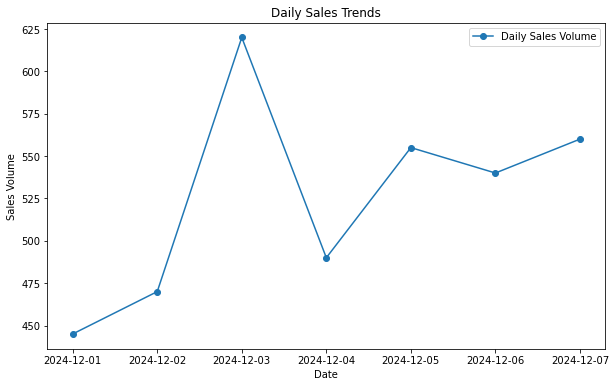

In [6]:
# Load the dataset into a DataFrame
sales_data = {
    "Product Category": ["Electronics", "Clothing", "Groceries", "Electronics", "Clothing", "Groceries",
                         "Electronics", "Clothing", "Groceries", "Electronics", "Clothing", "Groceries",
                         "Electronics", "Clothing", "Groceries", "Electronics", "Clothing", "Groceries",
                         "Electronics", "Clothing", "Groceries"],
    "Sales Volume": [120, 85, 240, 150, 100, 220, 200, 120, 300, 140, 90, 260, 175, 110, 270, 190, 100, 250, 160, 120, 280],
    "Price": [2500, 1500, 500, 2700, 1700, 520, 3000, 1800, 480, 2500, 1600, 450, 2800, 1750, 520, 2900, 1650, 500, 2650, 1800, 530],
    "Customer Demographics": ["Urban", "Rural", "Urban", "Suburban", "Urban", "Rural",
                               "Urban", "Urban", "Rural", "Suburban", "Rural", "Urban",
                               "Urban", "Suburban", "Rural", "Rural", "Urban", "Urban",
                               "Suburban", "Rural", "Urban"],
    "Time": ["2024-12-01", "2024-12-01", "2024-12-01", "2024-12-02", "2024-12-02", "2024-12-02",
             "2024-12-03", "2024-12-03", "2024-12-03", "2024-12-04", "2024-12-04", "2024-12-04",
             "2024-12-05", "2024-12-05", "2024-12-05", "2024-12-06", "2024-12-06", "2024-12-06",
             "2024-12-07", "2024-12-07", "2024-12-07"],
}

sales_df = pd.DataFrame(sales_data)

# Convert 'Time' column to datetime
sales_df['Time'] = pd.to_datetime(sales_df['Time'])

# Group data by product category and aggregate sales volume and price
category_sales = sales_df.groupby('Product Category')[['Sales Volume', 'Price']].sum()

# Plot sales volume by product category
plt.figure(figsize=(10, 6))
category_sales['Sales Volume'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sales Volume by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.show()

# Group by time and visualize sales trends
time_sales = sales_df.groupby('Time')['Sales Volume'].sum()

plt.figure(figsize=(10, 6))
plt.plot(time_sales.index, time_sales, marker='o', label='Daily Sales Volume')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend()
plt.show()

# C, Covid-19 Case Study

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


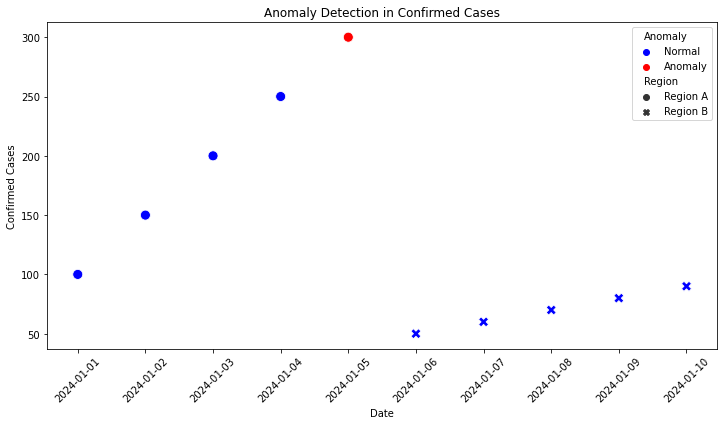

        Date    Region  Confirmed Cases  Recovered Cases  Deaths  \
0 2024-01-01  Region A              100               50       5   
1 2024-01-02  Region A              150               80       7   
2 2024-01-03  Region A              200              120      10   
3 2024-01-04  Region A              250              150      12   
4 2024-01-05  Region A              300              200      15   
5 2024-01-06  Region B               50               30       2   
6 2024-01-07  Region B               60               40       3   
7 2024-01-08  Region B               70               50       4   
8 2024-01-09  Region B               80               60       5   
9 2024-01-10  Region B               90               70       6   

   Rolling Confirmed  Rolling Recovered  Rolling Deaths  Anomaly  
0                NaN                NaN             NaN   Normal  
1                NaN                NaN             NaN   Normal  
2              150.0          83.333333        7.3

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Example COVID-19 dataset
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Region': ['Region A']*5 + ['Region B']*5,
    'Confirmed Cases': [100, 150, 200, 250, 300, 50, 60, 70, 80, 90],
    'Recovered Cases': [50, 80, 120, 150, 200, 30, 40, 50, 60, 70],
    'Deaths': [5, 7, 10, 12, 15, 2, 3, 4, 5, 6]
}

# Convert dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Calculate rolling averages (3-day window for example)
df['Rolling Confirmed'] = df.groupby('Region')['Confirmed Cases'].rolling(window=3).mean().reset_index(0, drop=True)
df['Rolling Recovered'] = df.groupby('Region')['Recovered Cases'].rolling(window=3).mean().reset_index(0, drop=True)
df['Rolling Deaths'] = df.groupby('Region')['Deaths'].rolling(window=3).mean().reset_index(0, drop=True)

# Prepare data for anomaly detection
features = ['Confirmed Cases', 'Recovered Cases', 'Deaths']  # Using raw features for simplicity
df_for_model = df[features]

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination as needed
df['Anomaly'] = iso_forest.fit_predict(df_for_model)

# Map anomaly values to more intuitive labels
df['Anomaly'] = df['Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Visualize the results
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Date',
    y='Confirmed Cases',
    hue='Anomaly',
    style='Region',
    palette={'Normal': 'blue', 'Anomaly': 'red'},
    s=100
)
plt.title('Anomaly Detection in Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

# Print the DataFrame to verify anomalies
print(df)
